#Question 1

##Part 1

In [83]:
#Setting up dataset
import os
os.system("wget https://www.dropbox.com/s/za7yb0cpfpewz4z/titanic.csv")

0

In [84]:
#importing dataset
import pandas as pd
df=pd.read_csv("titanic.csv")

In [85]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0


In [86]:
#preprocessing
df=df.drop(["Name","Ticket","Cabin","PassengerId"],axis=1)

#check not filled rows
df.isnull().sum()

#filling not filled values with mean 
df["Age"]=df["Age"].fillna(df["Age"].mean().round(0))

In [87]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Survived    0
dtype: int64

In [88]:
#show row with not filled values in embarked
df[df["Embarked"].isnull()]

,Pclass,Sex,Age,Fare,Embarked,Survived
61,1,female,38.0,80.0,NaN,1
829,1,female,62.0,80.0,NaN,1


In [89]:
#removing the above two rows
df=df.drop(829,axis=0)
df=df.drop(61,axis=0)

In [90]:
#one-hot encode the "Sex/gender" column
# 0 for male and 1 for female
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

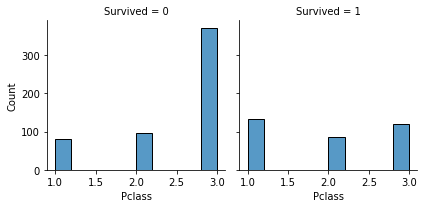

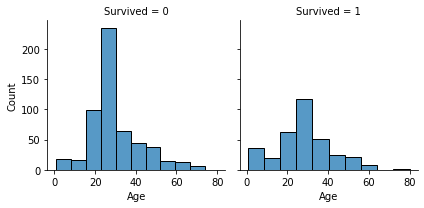

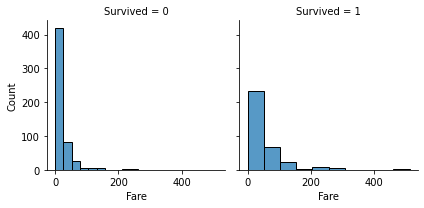

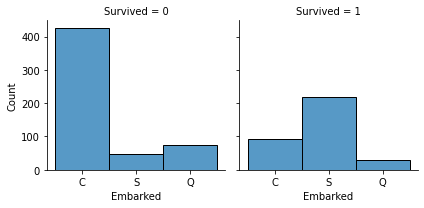

In [91]:
#visualizing data for every column
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Pclass',bins=10)

g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Age',bins=10)

g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Fare',bins=10)

g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Embarked',bins=10)

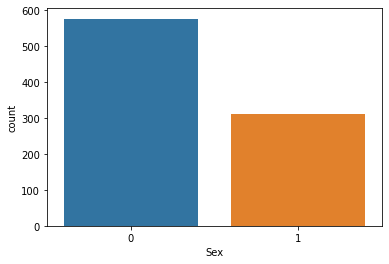

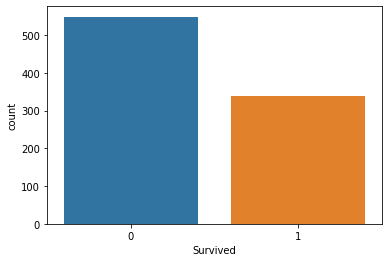

In [92]:
sns.countplot(x='Sex',data=df)
plt.show()

sns.countplot(x='Survived',data=df)
plt.show()

In [93]:
#one-hot encode Embarked column
df= pd.get_dummies(df, columns = ['Embarked'])
df

,Pclass,Sex,Age,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,7.2500,0,0,0,1
1,1,1,38.0,71.2833,1,1,0,0
2,3,1,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,3,0,35.0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0,0,1
887,1,1,19.0,30.0000,1,0,0,1
888,3,1,30.0,23.4500,0,0,0,1
889,1,0,26.0,30.0000,1,1,0,0


In [94]:
#Converting to X and y
preservedy=y=df['Survived']
preservedX=X=df.drop(['Survived'],axis=1)

In [95]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [96]:
X_train

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
57,3,0,28.5,7.2292,1,0,0
717,2,1,27.0,10.5000,0,0,1
822,1,0,38.0,0.0000,0,0,1
397,2,0,46.0,26.0000,0,0,1
164,3,0,1.0,39.6875,0,0,1
...,...,...,...,...,...,...,...
370,1,0,25.0,55.4417,1,0,0
321,3,0,27.0,7.8958,0,0,1
528,3,0,39.0,7.9250,0,0,1
126,3,0,30.0,7.7500,0,1,0


In [97]:
y_train

57     0
717    1
822    0
397    0
164    0
      ..
370    1
321    0
528    0
126    0
266    0
Name: Survived, Length: 711, dtype: int64

In [98]:
df

,Pclass,Sex,Age,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,7.2500,0,0,0,1
1,1,1,38.0,71.2833,1,1,0,0
2,3,1,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,3,0,35.0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0,0,1
887,1,1,19.0,30.0000,1,0,0,1
888,3,1,30.0,23.4500,0,0,0,1
889,1,0,26.0,30.0000,1,1,0,0


##Part 2


features Age and Fare are continuous and feature which are categorical are(Pclass, Sex, Embarked, and Survived).
so best variant is gaussian naive bayes
This classifier looks for continous features which are normally distributed and it fullfills our condition in dataset
this classifier is based on the probabilistic approach and Gaussian distribution

##Part 3

In [99]:
# Normalize all features between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scaling on the training data & test data and transform it
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnbcv = GaussianNB()
score = cross_val_score(gnb, X, y, cv=5)
print("Scores is: ",score.mean())
print("Std is: ", score.std())

Scores is:  0.7761950104741955
Std is:  0.052237658601284105


ROC AUC: 0.8438923395445134


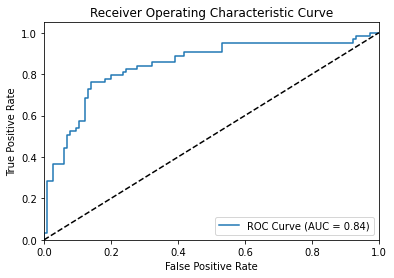

In [101]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

y_prob = gnb.predict_proba(X_test)[:,1]
y_pred = gnb.predict(X_test)

#ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC AUC curve
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()


In [102]:
accuracy_score(y_pred,y_test)

0.8146067415730337

##Part 4

Mean accuracy: 0.7717196724433442
Standard deviation: 0.0480414121926202


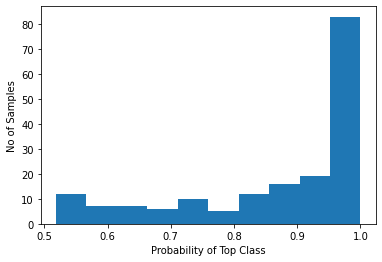

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np

# Save a copy of the original X and y to use later
X=preservedX
y=preservedy

scaler = MinMaxScaler()

gnb = GaussianNB()
kf = KFold(n_splits=5)
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Normalise
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)



# Calculate the mean and standard deviation of the accuracy scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Mean accuracy: {mean_score}")
print(f"Standard deviation: {std_score}")


#For calculating prob of top class
y_prob = gnb.predict_proba(X_test)

#probability of the top class for each row in the testing dataset.
top_class_index = np.argmax(y_prob, axis=1)
top_class_prob = y_prob[np.arange(len(y_prob)), top_class_index]

#plot the top_class_prob
plt.hist(top_class_prob)
plt.xlabel("Probability of Top Class")
plt.ylabel("No of Samples")
plt.show()

##Part 5

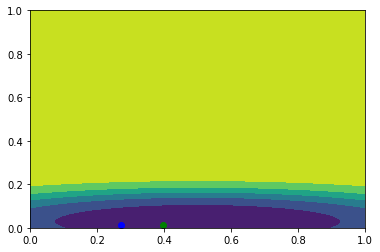

In [104]:
X=preservedX
y=preservedy

X=X[['Age','Fare']]

# Normalise
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# fitting model
gnb = GaussianNB()
gnb.fit(X, y)

# making contour plot
x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 889)
y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 889)
X_axis, Y_axis = np.meshgrid(x, y)
XX = np.array([X_axis.ravel(), Y_axis.ravel()]).T
Z = gnb.predict_proba(XX)[:,1].reshape(X_axis.shape)

plt.contourf(X_axis, Y_axis, Z)
plt.scatter(X[y==0,0], X[y==0,1], c='b')
plt.scatter(X[y==1,0], X[y==1,1], c='g')
plt.xlim(np.min(X[:,0]), np.max(X[:,0]))
plt.ylim(np.min(X[:,1]), np.max(X[:,1]))
plt.show()


##Part 6

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier(max_depth=8)
X=preservedX
y=preservedy

# Normalise
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

score = cross_val_score(dt, X, y, cv=5)

print("Scores is: ",score.mean())
print("Std is: ", score.std())

Scores is:  0.8099219196343554
Std is:  0.018036218507816008


#Question 2

##Part a

In [106]:
import os
os.system("wget https://www.dropbox.com/s/ubaniiu9xn6of9m/dataset%20%281%29.csv")

0

In [107]:
import pandas as pd
df=pd.read_csv("dataset (1).csv")

df.columns = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel',
                'Asymmetry coefficient', 'Length of kernel groove', 'Class']

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


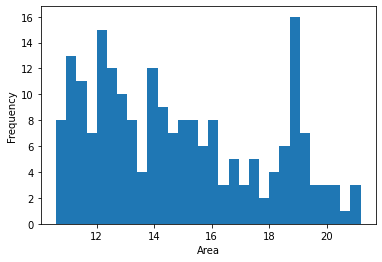

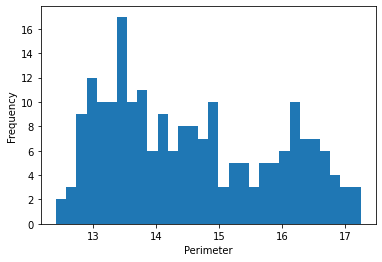

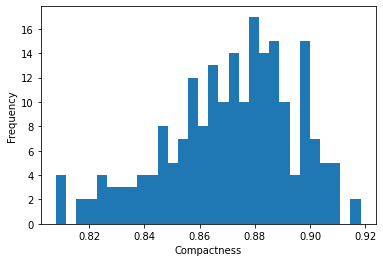

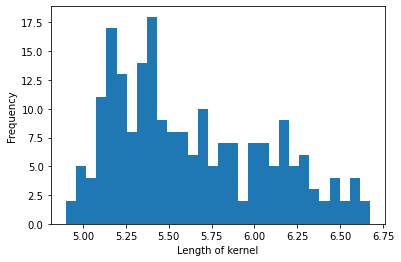

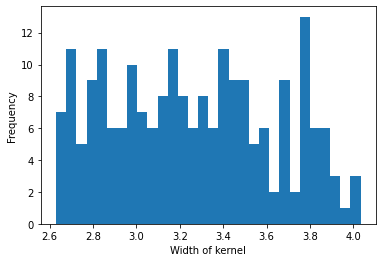

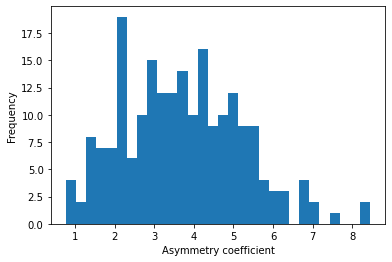

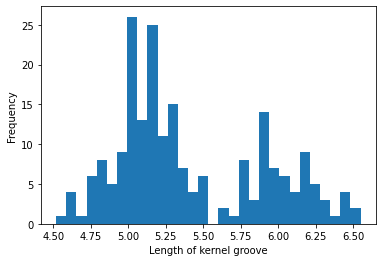

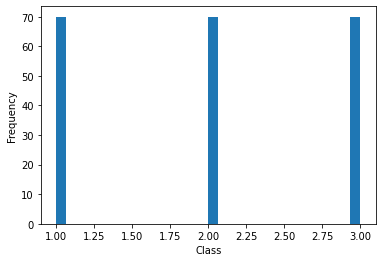

In [108]:
import matplotlib.pyplot as plt

for i in range(8):
    plt.figure()
    plt.hist(df.iloc[:,i], bins=30)
    plt.xlabel(df.columns[i])
    plt.ylabel("Frequency")

plt.show()


##Part b

In [109]:
c1pp=class_1_prior_probability = sum(df['Class'] == 1) / len(df['Class'])
c2pp=class_2_prior_probability = sum(df['Class'] == 2) / len(df['Class'])
c3pp=class_3_prior_probability = sum(df['Class'] == 3) / len(df['Class'])

print(c1pp,c2pp,c3pp)

0.3333333333333333 0.3333333333333333 0.3333333333333333


##Part c

In [110]:
X=df.drop(['Class'],axis=1)
Y=df['Class']

In [111]:
num_bins=10
num_features = X.shape[1]
X_discretized = np.zeros_like(X, dtype=np.int)
for i in range((num_features)):
    feature=df.iloc[:,i]
    bins = np.linspace(feature.min(), feature.max(), num_bins + 1)
    X_discretized[:, i] = np.digitize(feature, bins)

pd.DataFrame(X_discretized,columns=['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel',
                'Asymmetry coefficient', 'Length of kernel groove'])


<ipython-input-111-da19bf4845e7>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_discretized = np.zeros_like(X, dtype=np.int)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,5,6,6,5,5,2,4
1,5,5,7,4,6,1,3
2,4,4,9,3,6,3,2
3,4,4,8,3,6,2,2
4,6,6,9,5,7,1,4
...,...,...,...,...,...,...,...
205,2,2,7,2,3,4,2
206,1,1,4,2,2,5,3
207,3,3,8,2,5,10,3
208,2,2,4,2,2,4,3


##Part d

In [112]:
uni_class = np.unique(Y)

# class conditional probabilities array
class_cond_probs = np.ones((len(uni_class), num_bins, num_features))

for i, class_value in enumerate(uni_class):
    X_forwhich_Y_choosen = X_discretized[Y == class_value]
    number_samples_of_X = X_forwhich_Y_choosen.shape[0]

    for j in range(num_features):
        feature_col = X_forwhich_Y_choosen[:, j]
        histogram, _ = np.histogram(feature_col, bins=np.arange(num_bins + 1))
        
        # class conditional probability
        class_cond_probs[i, :, j] = histogram / number_samples_of_X

# likelihood
likelihood = np.sum(class_cond_probs, axis=0)

# likelihood normalised to get probabilities
likelihood /= len(uni_class)
print("Class conditional probability shape",class_cond_probs.shape)
print("Class conditional probability",class_cond_probs)
print("Likelihood shape",likelihood.shape)
print("Likelihood",likelihood)


# print("Class conditional probability for each class(bins been summedup) shape",np.sum(class_cond_probs,axis=1).shape)
# print("Class conditional probability for each class(bins been summedup)",np.sum(class_cond_probs,axis=1))
# print("Likelihood for each class(bins been summedup) shape",np.sum(likelihood,axis=0).shape)
# print("Likelihood for each class(bins been summedup)",np.sum(likelihood,axis=0))

Class conditional probability shape (3, 10, 7)
Class conditional probability [[[0.         0.         0.         0.         0.         0.
   0.        ]
  [0.02857143 0.02857143 0.         0.04285714 0.         0.18571429
   0.08571429]
  [0.04285714 0.02857143 0.         0.1        0.04285714 0.25714286
   0.17142857]
  [0.18571429 0.18571429 0.01428571 0.22857143 0.11428571 0.24285714
   0.27142857]
  [0.4        0.25714286 0.01428571 0.27142857 0.24285714 0.14285714
   0.31428571]
  [0.24285714 0.31428571 0.1        0.25714286 0.25714286 0.11428571
   0.14285714]
  [0.08571429 0.15714286 0.25714286 0.08571429 0.25714286 0.02857143
   0.        ]
  [0.01428571 0.02857143 0.25714286 0.01428571 0.07142857 0.01428571
   0.01428571]
  [0.         0.         0.18571429 0.         0.01428571 0.01428571
   0.        ]
  [0.         0.         0.15714286 0.         0.         0.
   0.        ]]

 [[0.         0.         0.         0.         0.         0.
   0.        ]
  [0.         0.     

##Part e

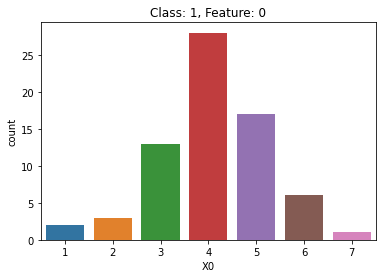

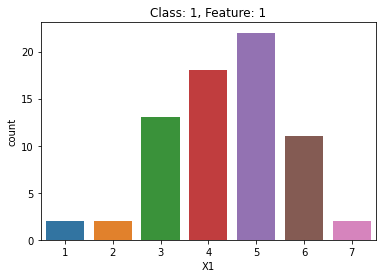

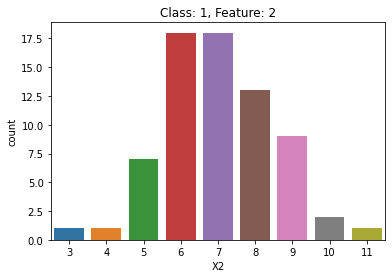

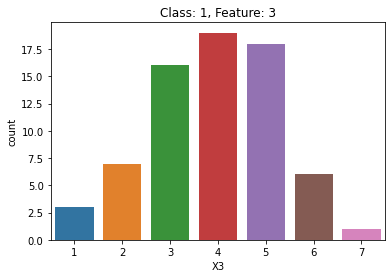

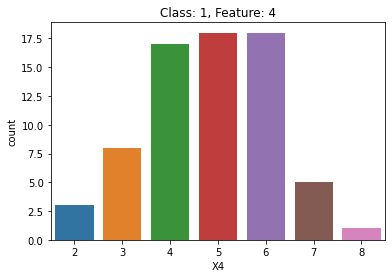

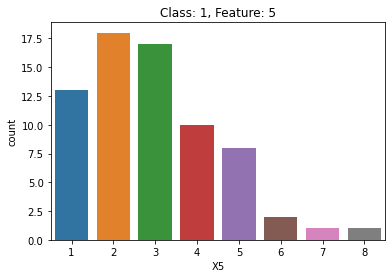

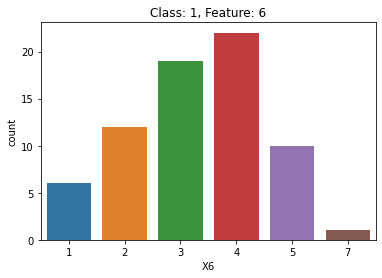

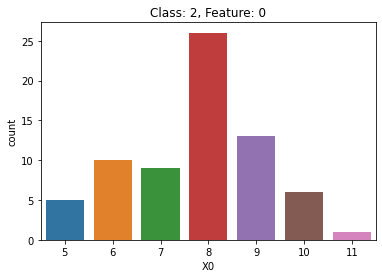

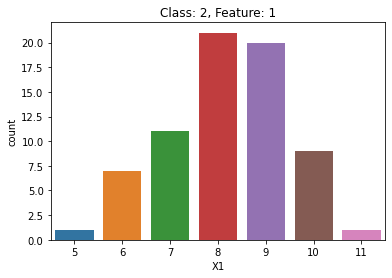

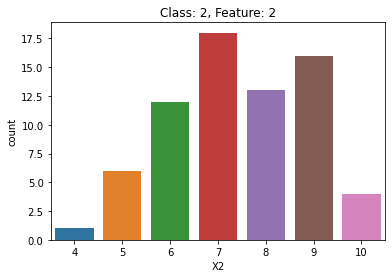

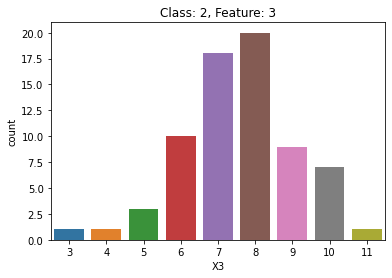

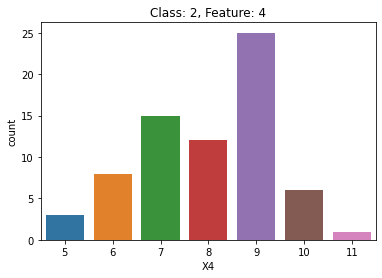

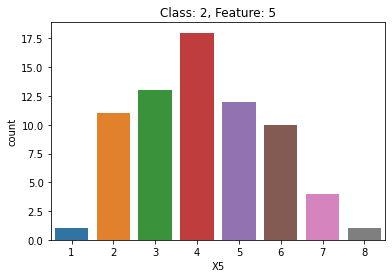

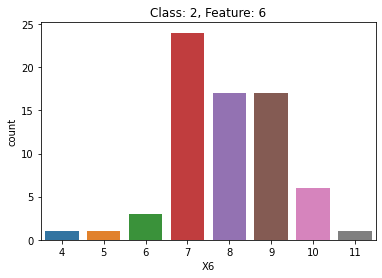

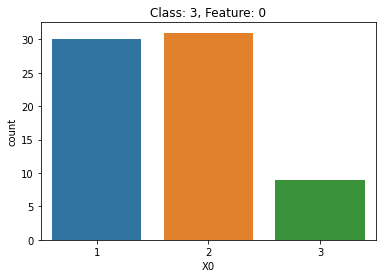

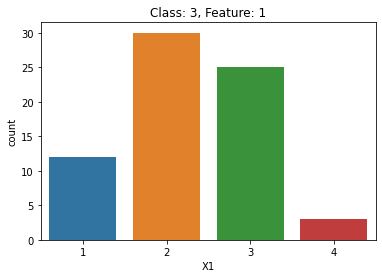

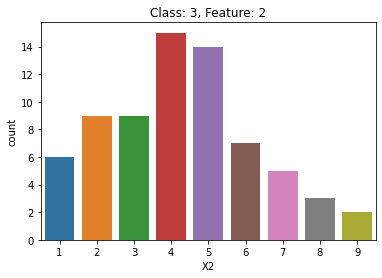

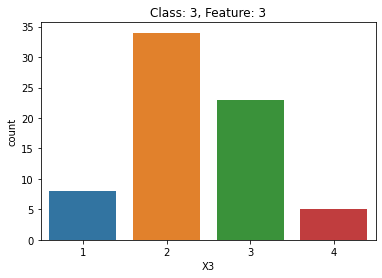

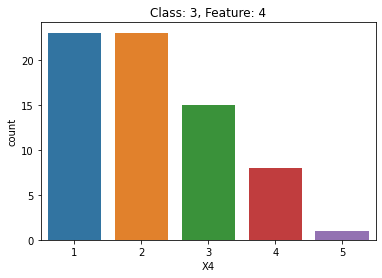

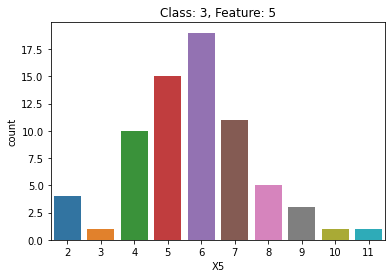

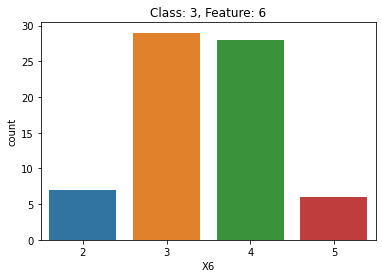

In [113]:
for i, class_value in enumerate(uni_class):
    X_forwhich_Y_choosen = X_discretized[Y == class_value]
    number_samples_of_X = X_forwhich_Y_choosen.shape[0]
    for j in range(num_features):
        feature_col = X_forwhich_Y_choosen[:, j]
        temp_df = pd.DataFrame(feature_col, columns=["X"+str(j)])
        sns.countplot(x="X"+str(j), data=temp_df)
        plt.title(f'Class: {class_value}, Feature: {j}')
        plt.show()


##Part f

<ipython-input-114-9bceee0f9962>:10: RuntimeWarning: invalid value encountered in double_scalars
  posterior_probs[i, j, k] = class_priors[i] * class_cond_probs[i, j, k] / likelihood[j, k]


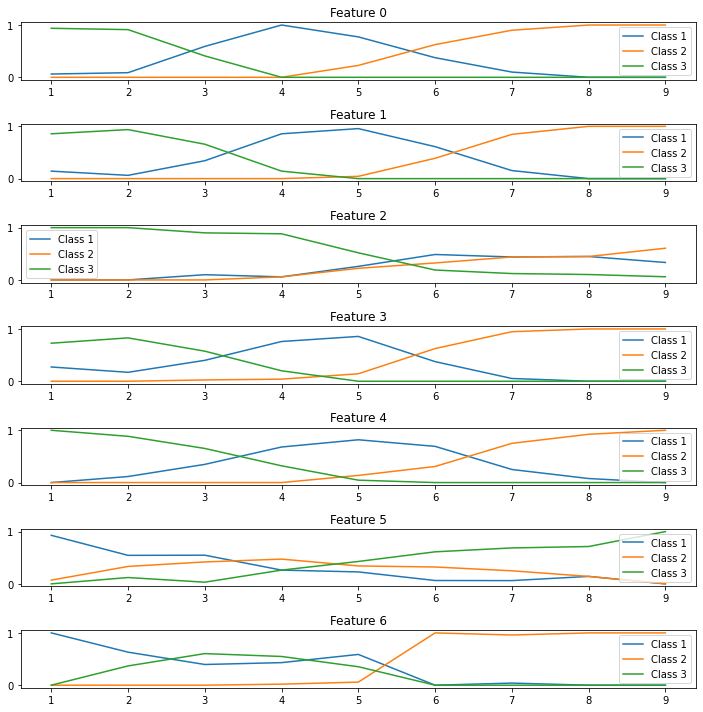

In [114]:
# class prior probabilities
class_priors = np.array([np.sum(Y == class_value) / Y.shape[0] for class_value in uni_class])

# posterior probabilities array
posterior_probs = np.ones((len(uni_class), num_bins, num_features))

for i in range(len(uni_class)):
    for j in range(num_bins):
        for k in range(num_features):
            posterior_probs[i, j, k] = class_priors[i] * class_cond_probs[i, j, k] / likelihood[j, k]

# Plotting
fig, axs = plt.subplots(num_features, 1, figsize=(10, 10))

for i in range(num_features):
    for j in range(len(uni_class)):
        axs[i].plot(posterior_probs[j, :, i], label=f'Class {uni_class[j]}')
    axs[i].legend()
    axs[i].set_title(f'Feature {i}')

plt.tight_layout()
plt.show()


In [115]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
